

## **✨SUPERLETS**

**References**

Moca, V. V., Bârzan, H., Nagy-Dăbâcan, A., & Mureșan, R. C. (2021). Time-frequency super-resolution with superlets. Nature Communications, 12(1), 337. https://doi.org/10.1038/s41467-020-20539-9

Data cadence: regular

Due to the Heisenberg–Gabor uncertainty principle, finite oscillation transients are difficult to localize simultaneously in both time and frequency. Classical estimators, like the short-time Fourier transform or the continuous-wavelet transform optimize either temporal or frequency resolution, or find a suboptimal tradeoff. A spectral estimator enabling time-frequency super-resolution, called superlet, uses sets of wavelets with increasingly constrained bandwidth. These are combined geometrically in order to maintain the good temporal resolution of single wavelets and gain frequency resolution in upper bands. The normalization of wavelets in the set facilitates exploration of data with scale-free, fractal nature, containing oscillation packets that are self-similar across frequencies. Importantly, they can reveal fast transient oscillation events in single trials that may be hidden in the averaged time-frequency spectrum by other methods.

A “superlet” (SL) is defined as a set of wavelets with a fixed central frequency, f, and spanning a range of different cycles (progressively constraining the bandwidth):




$$
\mathcal{S}_{f,o}=\left(\psi_{f,c}| c\in [c_{1},c_{o}] \right)
$$
 where $o$ is the order of $\mathcal{S}$, and $[c_{1}, c_{o}]$ are the number of cycles for each wavelet in the set.

The response of a $\mathcal{S}$ to a signal, $x$, as the geometric mean of multiple spectrograms, which is equivalent to the minimum mean cross-entropy

\begin{align}
R[\mathcal{S}_{f,o}]=\sqrt[o]{\prod^{o}_{i=1} R[\mathcal{S}_{f,o}]}
\end{align}

where, $R[ψ_{f,c_{i}}]$ is the response of wavelet i to the signal, i.e., the complex convolution (for complex wavelets, such as Morlet):

\begin{align}
R[ψ_{f,c_{i}}]=\sqrt{2}ψ_{f,c_{i}}*x
\end{align}

where, $ *$ is the complex convolution operator and x the signal.







### Import libraries and create artifical LC to test the module

In [1]:
import sys
# Import from local diroctory, the repository will be available on PIP as a final version
sys.path.insert(0, '/home/viktor/Documents/LSST/MAF/inkind/baseperiodicity')
from periodicity import *

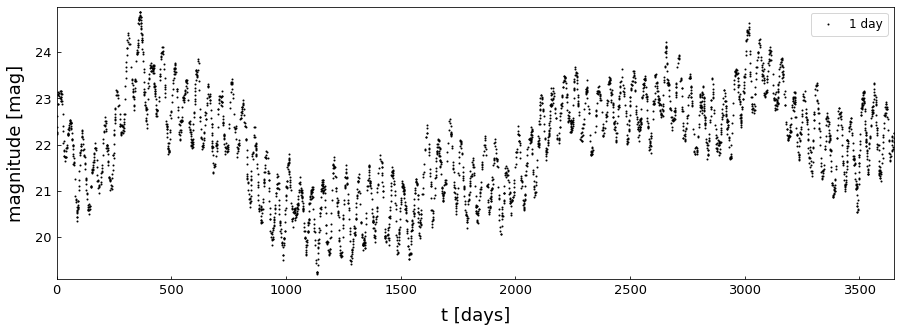

In [2]:
# Creating of a mock signal LC with frequency of 100 days, amplitude of 0.3
# Plot is created using functions in the utils subpackage
period = 50  #days
amplitude = 0.3

# Functions uses time interval in years, number of points, period, ampltude as main arguments
tt, yy = simple_mock_lc(time_interval = 10, num_points = 10*365, 
                                    frequency = period, amplitude = amplitude, percent = 0, magnitude = 22)
fig_plot(tt, yy)

In [3]:
corr, extent = superlets_methods(tt, yy, 80,  minfq = 500, maxfq = 10)
print(extent)

[79.57747155 49.35036995 35.76515575 28.04492389 23.06593378 19.58830069
 17.02191905 15.05011282 13.48770704 12.21918949 11.16876794 10.28464899
  9.53023611  8.87893685  8.31096309  7.81128555  7.3682844   6.97283431
  6.61766915  6.29693148  6.00584691  5.74048487  5.49758007  5.27439745
  5.06862876  4.87831243  4.70177084  4.53756074  4.38443369  4.24130428
  4.10722434  3.98136193  3.86298406  3.75144238  3.64616135  3.54662826
  3.45238488  3.36302046  3.27816567  3.19748756  3.12068516  3.04748575
  2.97764159  2.91092717  2.84713673  2.78608215  2.72759114  2.67150555
  2.61767999  2.56598054  2.51628369  2.46847527  2.42244967  2.37810897
  2.33536233  2.29412531  2.25431931  2.21587112  2.17871243  2.14277944
  2.10801249  2.07435573  2.04175681  2.01016663  1.97953909  1.94983085
  1.92100112  1.89301151  1.86582583  1.83940992  1.81373155  1.78876025
  1.76446722  1.74082519  1.71780834  1.6953922   1.67355356  1.65227037
  1.63152171  1.61128771  1.59154943  1.57228889]
[

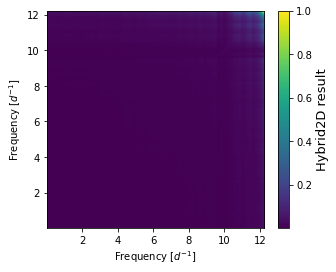

In [4]:
# Plotting wwz matrix heatmap
# Note how er can easly spot detected period
plt_freq_heatmap(corr, extent)

In [11]:
data = corr
ngrid = 80

hh1=np.rot90(data).T/np.rot90(data).T.max()
hh1arr=np.rot90(hh1.T)
hh1arr1=np.abs(hh1arr).sum(1)/np.abs(hh1arr).sum(1).max()
    
minfq = 500
maxfq = 10
    
fmin =1/minfq
fmax = 1/maxfq
df = (fmax - fmin) / ngrid
print(fmax)
print(fmin)
print(df)
    
    
    # osax interpolation (stacked data of h2d along one axis) to obtain more points
osax=np.arange(start=fmin,stop=fmax + df,step=df)
xax =np.arange(start=fmin, stop = fmax + df, step = df/2)


print(len(osax) )
print(len(np.abs(hh1arr1)) )

from scipy import interpolate
f = interpolate.interp1d(osax, np.abs(hh1arr1), fill_value="extrapolate")

0.1
0.002
0.001225
82
82


In [10]:
# Function for calculations of periods
r_periods, up, low = periods ('test', corr, 800, plot=True, save=True,  minfq = 500, maxfq = 10)

# Blue vertical lines represent the border of a half width of a peak
# Green and red horizontal lines represent the calculated values of a quantiles
# Purple line is a calculated value of half width of a peak

ValueError: x and y arrays must be equal in length along interpolation axis.